# HW1(~9/13)
HW1_학번_이름.ipynb 형태로 저장하여 Jupyter Notebook을 그대로 제출! <br>
(예: HW1_2020_12345_keondo.ipynb) <br>
훈련을 진행하고 Output을 지우지 말고 제출할 것!

In [1]:
import tensorflow as tf
from sklearn import model_selection
import matplotlib.pyplot as plt

## Problem 1: CIFAR10 데이터셋을 이용하여 MLP 모델 만들고 훈련시키기
다른 데이터셋을 이용하여 스스로 MLP를 구성하고 훈련해 보자. <br>
10개의 서로 다른 class를 가진 CIFAR10 데이터셋을 이용하여 비슷하게 MLP 모델을 만들고 훈련하여 제출하시오. <br>
모델은 최소한 3개 이상의 Dense layer를 사용하여 구성하여야 하고 0.4 이상의 Validation accuracy를 달성할 때까지 훈련을 진행하시오. 또한 Regularizer를 한번 이상 활용하시오.(Dropout 제외) <br>
*주의*: Fashion MNIST와 CIFAR10은 Input의 shape가 다르므로 이를 잘 고려해야 한다.

In [2]:
cifar10 = tf.keras.datasets.cifar10

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

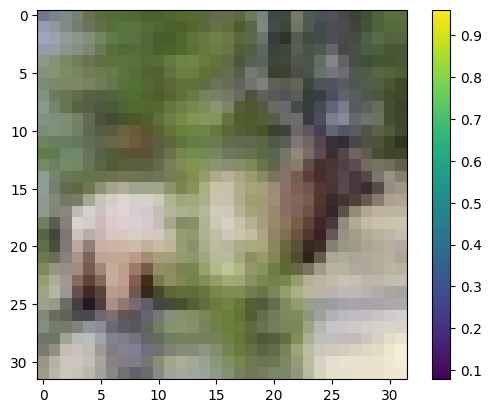

In [3]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

---
여기부터 수강생의 코드를 추가하시오

In [4]:
##################
    # Your code here
################### 
EPOCHS = 10
BATCH_SIZE = 64

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),  # input shape: 32x32x3 > 3072
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
# model compile
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.01)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])
history = model.fit(
    x=x_train, y=y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 1.9096 - accuracy: 0.3232 - val_loss: 1.7777 - val_accuracy: 0.3860
Epoch 2/10
625/625 [==============================] - 2s 2ms/step - loss: 1.7389 - accuracy: 0.3877 - val_loss: 1.6904 - val_accuracy: 0.4156
Epoch 3/10
625/625 [==============================] - 2s 2ms/step - loss: 1.6837 - accuracy: 0.4062 - val_loss: 1.6628 - val_accuracy: 0.4116
Epoch 4/10
625/625 [==============================] - 2s 2ms/step - loss: 1.6529 - accuracy: 0.4189 - val_loss: 1.6428 - val_accuracy: 0.4248
Epoch 5/10
625/625 [==============================] - 2s 2ms/step - loss: 1.6307 - accuracy: 0.4288 - val_loss: 1.6242 - val_accuracy: 0.4322
Epoch 6/10
625/625 [==============================] - 2s 2ms/step - loss: 1.6151 - accuracy: 0.4336 - val_loss: 1.6125 - val_accuracy: 0.4390
Epoch 7/10
625/625 [==============================] - 2s 2ms/step - loss: 1.6013 - accuracy: 0.4389 - val_loss: 1.6017 - val_accuracy: 0.4440
Epoch 

## Problem 2: 간단한 ResNet 구현

다음은 MLP layer만을 간단하게 구현한 ResNet-11 모델의 구조이다. 

`ResBlock`함수를 작성한 다음 `ResNet11`함수를 이용하여 ResNet-11를 구현해보자.
- 조건1: 1번째 ResBlock의 node는 100개, 2,3번째 ResBlock의 node는 200개를 사용한다.
- 조건2: 마지막 Layer의 node 수는 10개이다.
- 조건3: Activation은 모두 ReLU를 사용한다. 단, 마지막 layer에서는 Softmax activation을 사용한다. 
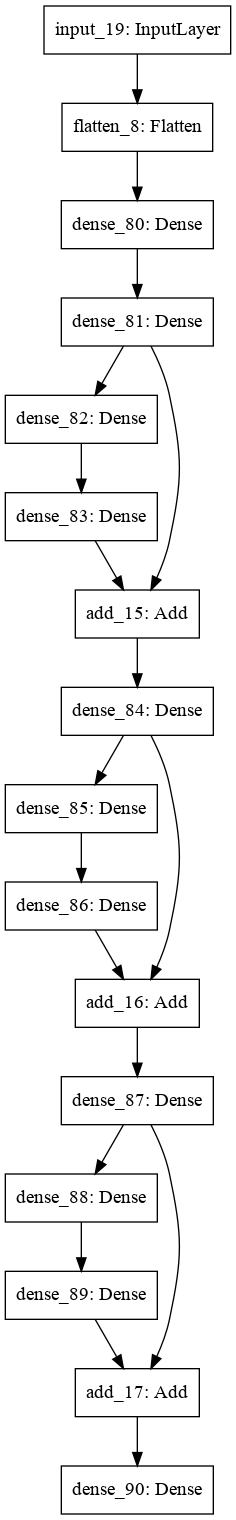


ResNet에 대해서는 다음 문서 참조:(https://openaccess.thecvf.com/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf) 

In [5]:
def ResBlock(x, nodes):
    ##################
    # Your code here
    ##################
    x_origin = x
    x = tf.keras.layers.Dense(units=nodes, activation='relu')(x)
    x = tf.keras.layers.Dense(units=nodes, activation='relu')(x)
    x = tf.keras.layers.Add()([x, x_origin])
    ##################
    
    return x    

In [6]:
def ResNet11():
    inputs = tf.keras.layers.Input(shape=(224, 224, 3))    
    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(100)(x)
    ##################
    # Your code here
    ##################
    outputs = ResBlock(x, nodes=100)
    x = tf.keras.layers.Dense(200)(x)  # upsampling
    x = ResBlock(x, nodes=200)
    x = tf.keras.layers.Dense(200)(x)
    x = ResBlock(x, nodes=200)
    outputs = tf.keras.layers.Dense(units=10, activation='softmax')(x)
    ##################
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [7]:
resnet11 = ResNet11()

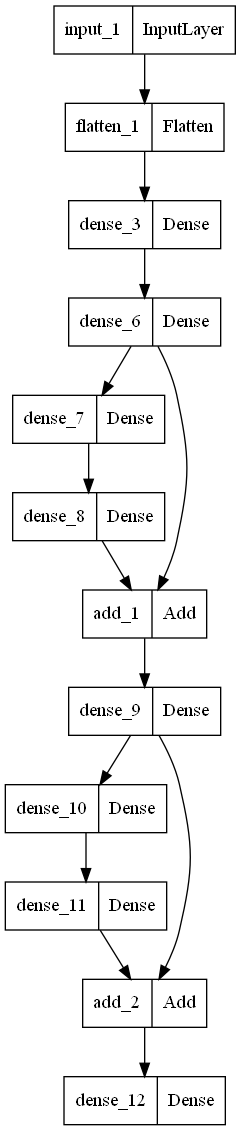

In [8]:
tf.keras.utils.plot_model(resnet11, to_file='resnet11.png')